## 3. Assignment

### Instructions: 
You will be presented with a scenario and will need to utilize your SQL and python skills to complete this assignment successfully. 

Put this .ipynb file in the `jupyter_notebooks` folder in your Docker SQLPython Container directory.  Then you will be able to connect to the database and run your code without issue.

Each group will submit two files:
1. a single Jupyter Notebook (.ipynb).  **You must run all cells before submitting.** This notebook should have all of the relevant visualizations and output displayed properly.  We will restart and run all of the code from this notebook, which should not produce any errors.
2. a PDF version (.pdf) of the Jupyter Notebook. This PDF should have all of the relevant visualizations and output displayed properly. 

In [1]:
#run this code first to connect to the database and verify the connection is working
## DO NOT MODIFY THIS CODE BLOCK
## If you have placed this notebook in the jupyter notebooks folder properly, 
## this block should return the first two rows of the customers table

from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
print(cnxn_string)

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="behappy",
    host="postgres",
    port=5432,
    database="sqlda"))

engine.execute("SELECT * FROM customers LIMIT 2;").fetchall()

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

## Scenario 

You are a team of extremely successful data scientists at a top motor dealership company. You need to create summary tables and visualizations that your boss will present at the next company shareholder meeting.  She has sent you the following e-mail describing what she needs.

***
From: importantboss@topmotordealershipcompany.com

To: datascienceteam@topmotordealershipcompany.com

Subject: Data request for shareholder meeting

For our next shareholder meeting, we need to provide more information about sales performance across states, across dealerships, and across sales channels.  Please send me information to address the following items for our next shareholder meeting along with your thoughts.

1. Sales performance at the state level (top 5 and bottom 5 states)
2. For the best performing states, which dealerships are performing well and how are they trending?
3. In states with dealerships, does the distribution of sales amounts vary across channels (internet vs. dealership)?

Thank you!

-Important Boss

***

Your team promptly comes up with the following plan.

## Part 1: Visualizing the top and bottom performing states

1. Write a SELECT query that returns the total sales amount for each state from January 1, 2017 to now.  The table should have two columns, `state` and `total_sales_amount`, with one row for each state ordered by `total_sales_amount` in *descending* order. Make sure that `total_sales_amount` is rounded appropriately.  Attribute sales to states based on the **state in which the customer that made the purchase resides**.  This way we can capture both sales made through dealerships, as well as sales made through our website, in evaluating state-level performance.  


2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_by_state`.


3. Display the rows in `sales_by_state` corresponding to the 5 states with the **largest** total sales amount in *descending* order.


4. Display the rows in `sales_by_state` corresponding to the 5 states with the **smallest** total sales amount in *ascending* order.


5. Visualize sales performance by state for the top and bottom performing states discovered in 1.3 and 1.4.  You can use more than one visualization.  These should be **presentation ready** (e.g. appropriate and complete titles and axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, etc.). 

Include the code needed for each component of part 1 in the appropriate code block below.

In [2]:
#1.1
query_1 =  """
select c.state, round(cast(sum(sales_amount) as numeric), 2) as total_sales_amount 
from sales as s 
inner join 
customers as c on s.customer_id = c.customer_id 
where state is not NULL AND sales_transaction_date >= '2017-01-01'
group by state 
order by total_sales_amount desc;
"""


edateq = """
SELECT MAX(sales_transaction_date) AS date
FROM sales;
"""

In [3]:
#1.2 create dataframe
import datetime
sales_by_state = pd.read_sql_query(query_1,engine)
sales_by_state = sales_by_state.sort_values('total_sales_amount', ascending=False)


sdate = '01/01/2017'

edate = pd.read_sql_query(edateq,engine)
edate = edate['date'][0].strftime('%m/%d/%Y')

In [4]:
#1.3 display top 5 performing states
print(f'The top 5 performing states in descending order between {sdate} and {edate} are:')
sales_by_state.head(5)

The top 5 performing states in descending order between 01/01/2017 and 05/31/2019 are:


,state,total_sales_amount
0,CA,15857815.99
1,TX,15425788.00
2,FL,10410607.25
3,NY,9523439.42
4,PA,5031834.85


In [5]:
#1.4 display bottom 5 performing states
print(f'The bottom 5 performing states in ascending order between {sdate} and {edate} are:')
sales_by_state.tail(5).sort_values('total_sales_amount', ascending=True)

The bottom 5 performing states in ascending order between 01/01/2017 and 05/31/2019 are:


,state,total_sales_amount
50,WY,3249.94
49,RI,6099.90
48,SD,24179.58
47,VT,30014.96
46,ME,36364.92


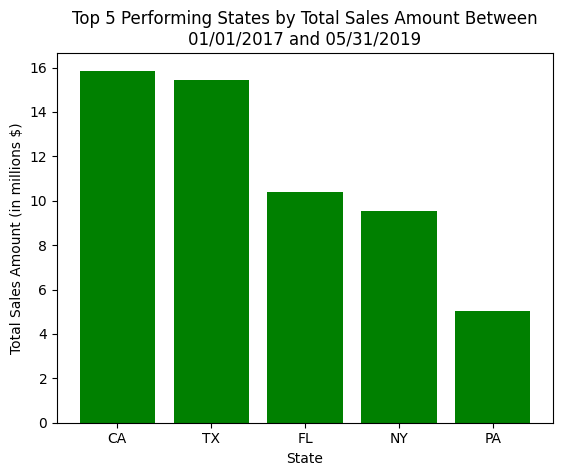

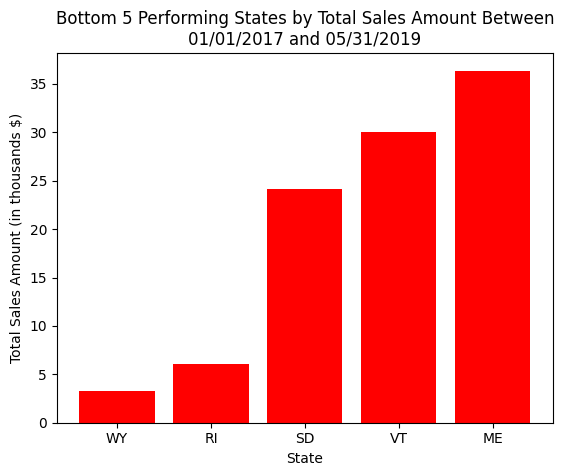

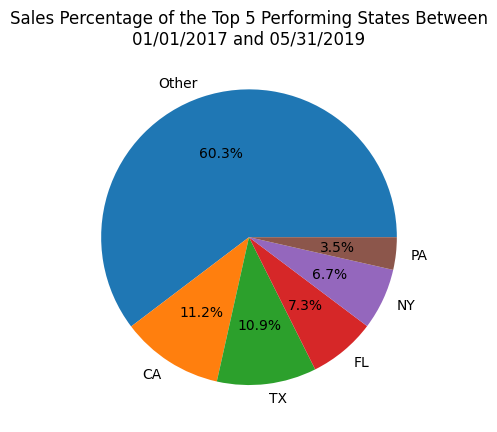

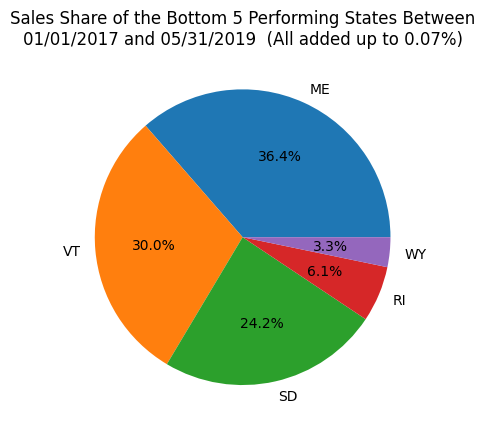

In [6]:
from textwrap import wrap

# Dividing the sales amounts by 1 million
sales_by_state['total_sales_millions'] = sales_by_state['total_sales_amount'] / 1000000

# Dividing the sales amounts by 1 thousand
sales_by_state['total_sales_thousands'] = sales_by_state['total_sales_amount'] / 1000

# Plotting top performing states
plt.bar(sales_by_state.head(5)['state'], sales_by_state.head(5)['total_sales_millions'], color='green')
plt.xlabel('State')
plt.ylabel('Total Sales Amount (in millions $)')
plt.title("\n".join(wrap(f"Top 5 Performing States by Total Sales Amount Between {sdate} and {edate}", 60)))
plt.show();

# Plotting bottom performing states
plt.bar(sales_by_state.tail(5).sort_values('total_sales_amount', ascending=True)['state'], sales_by_state.tail(5).sort_values('total_sales_amount', ascending=True)['total_sales_thousands'], color='red')
plt.xlabel('State')
plt.ylabel('Total Sales Amount (in thousands $)')
plt.title("\n".join(wrap(f"Bottom 5 Performing States by Total Sales Amount Between {sdate} and {edate}", 60)))
plt.show();


# Plotting top performing states
# Creating a copy of the sales_by_state dataframe
sales_by_state_modified = sales_by_state.copy()

# Replacing states outside top 5 and bottom 5 with 'other'
sales_by_state_modified.loc[~sales_by_state_modified['state'].isin(sales_by_state.head(5)['state'].tolist()), 'state'] = 'Other'

# Aggregating sales by state
sales_by_state_modified = sales_by_state_modified.groupby('state').sum()

# Calculating the percentage of total sales for each state
sales_by_state_modified['percent_sales'] = sales_by_state_modified['total_sales_amount'] / sales_by_state_modified['total_sales_amount'].sum() * 100

# Sorting the dataframe by percentage of total sales in descending order
sales_by_state_modified = sales_by_state_modified.sort_values(by='percent_sales', ascending=False)

# Plotting the pie chart
plt.pie(sales_by_state_modified['percent_sales'], labels=sales_by_state_modified.index, autopct='%1.1f%%')
plt.title("\n".join(wrap(f"Sales Percentage of the Top 5 Performing States Between {sdate} and {edate}", 60)))
plt.show();

# Plotting bottom performing states
plt.pie(sales_by_state.tail(5)['total_sales_amount'], labels=sales_by_state.tail(5)['state'], autopct='%1.1f%%')
plt.title("\n".join(wrap(f"Sales Share of the Bottom 5 Performing States Between {sdate} and {edate}\n (All added up to {round(sales_by_state.tail(5)['total_sales_amount'].sum()/sales_by_state['total_sales_amount'].sum()*100,2)}%)", 60)))
plt.show();


## Part 2: Top performing dealerships

Create a table and visualization of historical cumulative sales amounts by dealership from January 1, 2017 to now.  Only include dealerships located in the *top two* states determined in Part 1.  It is OK to reference these two states by their abbreviations (e.g. AL, MS, WY) in the query you will develop below since this is a one-off request.

To do this, perform the following steps:
    
   1. Write a SELECT query that returns three columns: `dealership_id`,`sales_transaction_date`, and `cumulative_sales`.  `cumulative_sales` represents the cumulative sales amount from January 1, 2017 to the `sales_transaction_date` for dealership identified by `dealership_id`.  There should be a row for each distinct combination of `dealership_id` and `sales_transaction_date` in the `sales` table (*hint*: window function).
    
    
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `cumulative_sales_bydealership`.
    
    
   3. Appropriately visualize historical cumulative sales by dealership across sales transaction dates *in a single plot* (*hint*: seaborn). Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, integer-valued dealership IDs, states indicated clearly, etc.). 

In [7]:
#2.1
query_2 = """
select cast(dealership_id as int), sales_transaction_date, 
sum(round(cast(sales_amount as numeric),2)) 
    over (partition by dealership_id order by sales_transaction_date) as cumulative_sales
from sales
where dealership_id in (select dealership_id from dealerships where state in ('CA', 'TX')) AND sales_transaction_date >= '2017-01-01';
"""

In [8]:
#2.2
cumulative_sales_bydealership = pd.read_sql_query(query_2,engine)
cumulative_sales_bydealership
#This is done for plotting purposes to show y-axis in millions
cumulative_sales_bydealership['cumulative_sales'] = cumulative_sales_bydealership['cumulative_sales']/1000000 



,dealership_id,sales_transaction_date,cumulative_sales
0,2,2017-01-02 17:02:32,399.99
1,2,2017-01-06 01:37:05,799.98
2,2,2017-01-10 14:32:16,1199.97
3,2,2017-01-10 15:55:24,1799.96
4,2,2017-01-18 04:57:53,2399.95
...,...,...,...
3124,19,2019-05-25 08:43:16,5141794.63
3125,19,2019-05-25 18:51:16,5142144.62
3126,19,2019-05-28 10:11:00,5142844.61
3127,19,2019-05-30 23:25:58,5143194.60


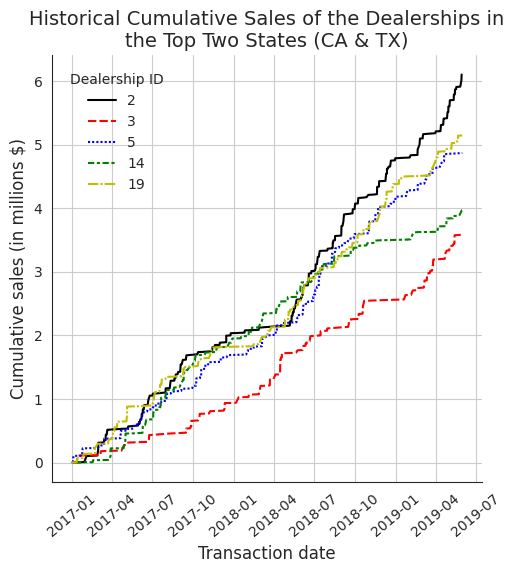

In [9]:
#2.3
from textwrap import wrap

sns.set_style("white")
g = sns.relplot(x = "sales_transaction_date", y = "cumulative_sales", data = cumulative_sales_bydealership, 
            hue = "dealership_id", kind = "line", style = "dealership_id", palette=["black", "r", "blue", "green", "y"], legend="auto")

plt.title("\n".join(wrap("Historical Cumulative Sales of the Dealerships in the Top Two States (CA & TX)", 50)), fontsize = 14)
plt.xticks(rotation=40)
plt.xlabel("Transaction date", fontsize = 12)
plt.ylabel("Cumulative sales (in millions $)", fontsize = 12)
sns.move_legend(g, "upper left", bbox_to_anchor=(0.115, 0.96))
g._legend.set_title("Dealership ID")

plt.grid()
plt.show();

## Part 3: Sales amount by sales channel

Create tables and visualizations to compare sales amounts by sales channel for sales made on or after January 1, 2015.  **Only include sales made to customers that reside in a state that has a dealership.** To do this, perform the following steps:
    
   1. Write a SELECT query that returns sales with a transaction date on or after January 1, 2015 from the `sales` table made to customers that reside in a state that has a dealership.  This table should have the following four columns: `channel`,`sales_amount`, and `sales_type` and `sales_year`. `channel` and `sales_amount` are exactly as appears in the `sales` table. `sales_type` is a derived categorical field that takes on a value of `'High value'` when `sales_amount` is above 50000, `'Typical value'` when `sales_amount` is above 10000 but less than or equal to 50000, and `'Low value'` when `sales_amount` is less than 10000.  `sales_year` is the year from the `sales_transaction_date` field.  
   
   
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_from_dealershipstates`.
   
   
   3. Appropriately visualize the distribution of sales amounts and how it changes by `channel`, `sales_year`, and `sales_type`.  To do this, create multiple plots, one for each distinct combination of `sales_year` and `sales_type`.  For each plot, visualize and compare the distribution of dealership sales amounts and internet sales amounts.  For example, one plot will compare the distribution of dealership sales amounts and internet sales amounts for low value sales in 2015.  Arrange the plots so that you can see changes across `sales_year` and `sales_type` (*Hint: seaborn.FacetGrid*). Visualizations should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, etc.). 

In [10]:
#3.1 select query
query_3 = """
select channel, sales_amount,
case when sales_amount > 50000 then 'High value'
when sales_amount > 10000 then 'Typical value'
else 'Low value' end as sales_type, 
extract(year from sales_transaction_date) as sales_year
from sales s join customers c on s.customer_id=c.customer_id
where extract(year from sales_transaction_date) >= 2015 
and c.state in (select state from dealerships)
and sales_amount is not NULL;
"""



In [11]:
#3.2 create data frame
sales_from_dealershipstates = pd.read_sql_query(query_3,engine)
sales_from_dealershipstates['sales_year'] = sales_from_dealershipstates['sales_year'].astype(int)
sales_from_dealershipstates
#This is for plotting purposes only
sales_in_mil = sales_from_dealershipstates
sales_in_mil['sales_amount'] = sales_in_mil['sales_amount']/1000000
sales_in_mil

,channel,sales_amount,sales_type,sales_year
0,dealership,599.990,Low value,2017
1,internet,479.992,Low value,2019
2,dealership,539.991,Low value,2017
3,dealership,539.991,Low value,2019
4,dealership,599.990,Low value,2017
...,...,...,...,...
15183,dealership,95000.000,High value,2019
15184,dealership,95000.000,High value,2019
15185,dealership,95000.000,High value,2019
15186,internet,76000.000,High value,2019


,channel,sales_amount,sales_type,sales_year
0,dealership,0.00060,Low value,2017
1,internet,0.00048,Low value,2019
2,dealership,0.00054,Low value,2017
3,dealership,0.00054,Low value,2019
4,dealership,0.00060,Low value,2017
...,...,...,...,...
15183,dealership,0.09500,High value,2019
15184,dealership,0.09500,High value,2019
15185,dealership,0.09500,High value,2019
15186,internet,0.07600,High value,2019


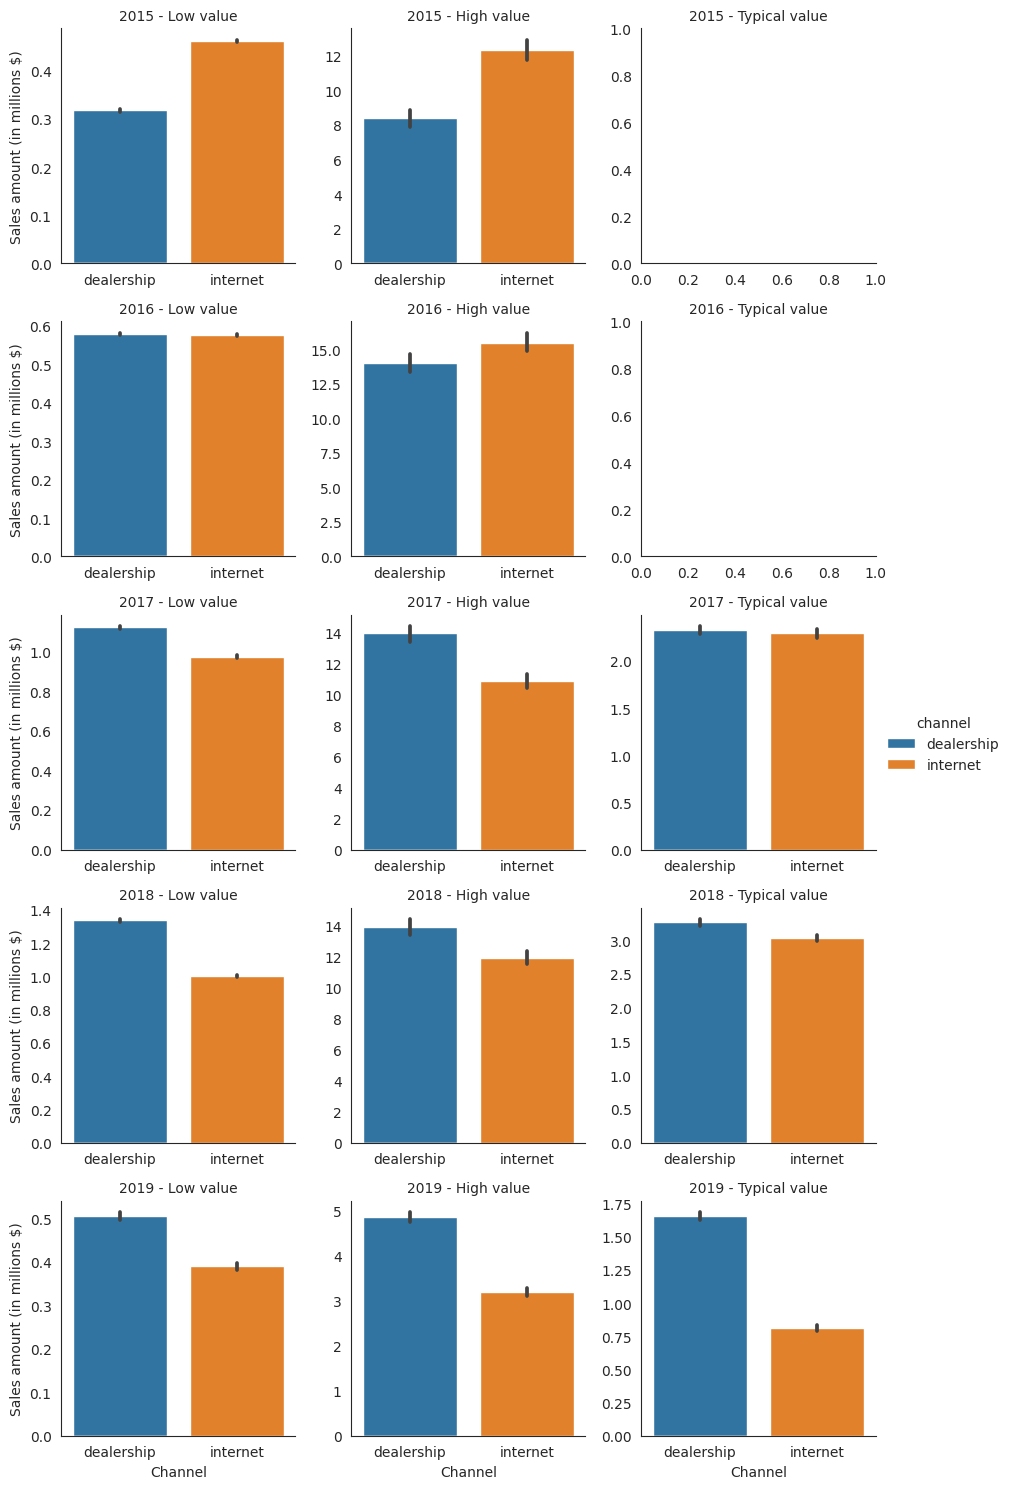

In [12]:
grid = sns.FacetGrid(sales_in_mil, row='sales_year', col='sales_type', hue='channel',sharey=False, sharex=False)


grid.map(sns.barplot, 'channel', 'sales_amount', order=['dealership', 'internet'], estimator=sum)


grid.add_legend()


grid.set_titles('{row_name} - {col_name}')
grid.set_axis_labels('Channel', 'Sales amount (in millions $)')


plt.show();


## Part 4: Takeaways from the analysis

Provide your thoughts about the analysis above by answering the following questions in the blank markdown cells provided below. No code should be run for this section.


   1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
          
          
   2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
   
   
   3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that would influence your performance assessment. 
     
     
   4. (Part 3):  How does sales amount compare for the two channels (internet and dealership)?  Is one channel generating more sales than another? Is one channel generating higher sales amounts than the other?  Does this comparison change year-over-year?  Does this comparison change by sales type?  Be specific and cite specific elements of the visualization created in Part 3 to support your claims. 
   
   
   5. (Part 3): What are some potential hypotheses as to why the distribution of sales amounts compared across channel, year, and sales type behaves in the manner you described in 4.4?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

### Part 4 Responses

For each of the following questions, answer in as much preciseness and clarity that you can. Refer back to the tables and plots that you have created to back up your answers if necessary. Answer each question in the cell below. You are NOT to code anything for this section. This is for you to reflect on the analysis developed in response to Parts 1-3.

1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

Some potential hypotheses as to why the top 5 performing states have the highest sales amounts are:

1. Population: The top 5 performing states might have a higher population than other states, which could lead to more sales.

2. Economic activity: The top 5 performing states might have a higher level of economic activity (e.g., more businesses, higher GDP, etc.), which might be reflected by the number of dealership in each state.


To test these hypotheses in further analysis, we could collect additional data and perform statistical tests. For example, to test the population hypothesis, we could gather data on population for each state and compare it to sales data. We could then perform a correlation analysis to see if there is a significant relationship between population and sales.

Similarly, to test the economic activity hypothesis, we could write a query to get the number of dealerships in each state and compare that information with sales information to examine if the relationship indicates that top and bottom performing states correspond to states with the most and fewest dealerships.








 2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

- There may be fewer or no dealerships in these states, so there may be a lot of travel involved to reach one. Thus, they would rely on internet sales only.

- The population is relatively low in these states, so there are less potential customers overall.

Further analysis or queries:

Check what dealerships are in these states, or how far they are from a dealership. 

How is the product diversity? For example, are the customers limited to only some types of products when compared to other states?

Are these states also significantly lower per capita, or are they still selling similarly to other states when accounting for population?

3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that could influence your performance assessment. 


The sales rate of dealership 3 was lower early on than the other 4 top dealerships, up until around April 2018. It had a large jump in sales around then that allowed it to be closer to the other stores' totals. Multiple dealerships saw some increase in sales rate around that time, notably dealership 2, which took the spot as the dealership with the highest cumulative sales around July 2018. It would retain that spot for the remainder of the timeframe of the graph. Just after October 2018, dealerships 3 and 14 each saw little to no sales over the course of about 3 months. Dealership 3 recovered well, having a high rate of sales just afterward, but dealership 14 had a slower sales rate for the rest of the graph.

 4. (Part 3):  How does sales amount compare for the two channels (internet and dealership)?  Is one channel generating more sales than another? Is one channel generating higher sales amounts than the other?  Does this comparison change year-over-year?  Does this comparison change by sales type?  Be specific and cite specific elements of the visualization created in Part 3 to support your claims. 

In 2015, Internet sales were significantly higher than dealership sales. In 2016, sales were much more even, and they were basically equal for low value cars. Notably, no typical value products were sold in 2015 or 2016.

For the years the 2017, 2018, and 2019, more sales were made by dealerships across all sales types. In 2017, Internet sales fell for high value cars while dealerships sold a similar amount, making dealership sales higher in comparison. Low value car sales had a similar spread between dealership and Internet sales, while typical value car sales were almost equal between them.

2018 saw a similar spread for high value cars, but dealerships sold even more cars than the Internet than they had in 2017. Typical value car sales were still close, with dealerships having a slight edge.

For 2019, dealership sales are much higher than Internet sales across the board. There is a similar gap for low value cars compared to 2018, but high and typical value car sales by dealerships are much higher. Dealerships have sold over twice as many typical value cars in 2019 as the Internet.

5. (Part 3): What are some potential hypotheses as to why the distribution of sales amounts compared across channel, year, and sales type behaves in the manner you described in 4.4?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

We see that sales distribution is higher in dealerships than over the internet, especially in the years 2017,2018,2019 in the graphs of high value. One hypothesis is that buying a car is a big investment, and many consumers prefer to have a personalized experience when making such a purchase. Dealerships offer face-to-face interactions with salespeople who can answer their questions, offer test drives, and provide guidance throughout the buying process. 

We see that as the years go by, the customers prefer going to dealerships since the bars of the dealership are higher than the internet for low, typical, and high values. In the years 2015 and 2016, sales distributions were more on the Internet. A possible reason for that is there were fewer dealerships available to people nearby, so they made their purchases over the Internet. 

A way to analyse this hypothesis is to analyze the relationship between the date a dealership was opened, and check it against the all the sales made in that dealership and whether those dealerships are within 50 miles or so of the customer that made the purchase. The tables closest_dealerships, dealerships, and sales will be used for this analysis. If more dealership sales were done in 2017 and more dealerships opened in 2017, then the data correlates. We can also check the nearest dealership to customers who made internet sales in 2016 and earlier and check whether they are more than a few hundred miles away. 

